### Garnets Revisited

This is a project to explore a dataset from my 2010 paper "Laser-induced breakdown spectroscopy-based geochemical fingerprinting for the rapid analysis and discrimination of minerals: the example of garnet. Applied Optics, Vol. 49, Issue 13 · Jan 1, 2010." The data is a collection of spectroscopy data sampled from 157 garnet samples. Each garnet was sample 25 times using a Laser Induced Breakdown Spectroscopy  (LIBS) system by myself at the Army Research Laboratory at Aberdeen Proving Grounds in the summer of 2008.  Single-laser-shot broadband LIBS emission spectra were acquired over 13,699 linearly spaced channels in a CCD spectrometer. These 25 samples were averaged producing the data present here. In the original paper a classification algorithm was developed using a decision tree model. Garnets would be classified by type first then by geographic origin. The method of classification was by dimensionality reduction via principal components analysis and the use of a k-nearest neighbor classification scheme.




## Principle Components Analysis and K Nearest Neighbor Approach
Here I have replicated the work from 2010 in Python for classification by garnet type but not by geogrpahic orgin. The sample sizes for each individual type of garnets are so small it feels inappropriate to utalize these tools in this setting. A non-trival amount of time was dedicated to finding the type labels for the data. This was not well recorded in the original data set.

In [ ]:
#import relevant packages and load data
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
LIBS=pd.read_csv(r"/content/LIBS.csv")

In [ ]:
# Removes the 1-6 class lables in the 0th row.
garnet=LIBS.drop([0])
# defines an ordered array of the types for each entry
types=LIBS.iloc[0,:].values
#converts dataframe to float
garnet=garnet.apply(pd.to_numeric,errors='coerce')
garn=garnet.transpose()


In [ ]:
# runs PCA
pca = PCA(n_components=26)
garnet_pca=pca.fit(garn).transform(garn)

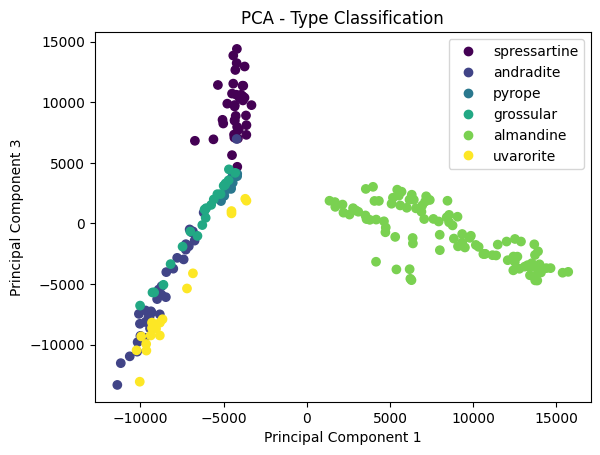

In [ ]:
# plots PCA scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(garnet_pca[:, 0], garnet_pca[:, 1], c=types)
plt.title('PCA - Type Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['spressartine','andradite','pyrope','grossular','almandine','uvarorite'],loc='upper right')
plt.show()

Here we can see a graph of the first and third principle components. It is clear that some seperation between the types of garnet is already appearent.

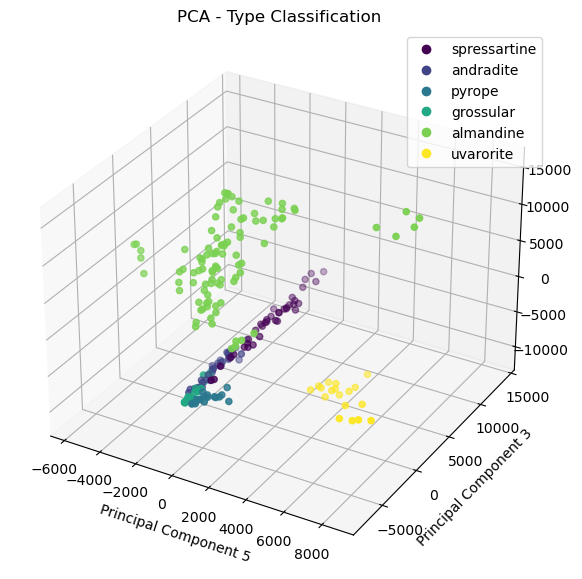

In [ ]:
#%% plots 3D PCA scatter plot
x=garnet_pca[:,4]
y=garnet_pca[:,2]
z=garnet_pca[:,0]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, c = types)
plt.title('PCA - Type Classification')
plt.xlabel('Principal Component 5')
plt.ylabel('Principal Component 3')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['spressartine','andradite','pyrope','grossular','almandine','uvarorite'],loc='upper right')



In this three dimensional graph of the first, third, and fifth principle components we can start to see a seperation of the data beyond the two dimensional graph. Garnets have different chemical structures and the principle components here essentially are in correspondence with the major chemical makeup of the samples. For example, Andradite ($Ca_3Fe_2(SiO_4)_3$), Grossular ($Ca_3Al_2(Si0_4)_3$), and Uvarovite ($Ca_3Cr_2(SiO_4)_3$) all contain calcium and  appear on the same 'branch' in the two dimensional graph but with the addition of PC 5 the Uvarovite samples clearly separate from the other types. In contrast, Almandine ($Fe_3Al_2(SiO_4)_3$) is the only garnet type here with an Fe3 in its structure, which explains why its seperation from the other samples is clear even with just two dimensions.

In [ ]:
# test train split

garn_train, garn_test, types_train, types_test=train_test_split(
    garnet_pca, types, test_size=0.2, random_state=42)

# KNN Classifier
knn_types = KNeighborsClassifier(n_neighbors=5)
knn_types.fit(garn_train, types_train)
pred_types = knn_types.predict(garn_test)
# produces confusion matrix
test_list=types_test.tolist()
pred_list=pred_types.tolist()
PCA_cm_norm=confusion_matrix(types_test,pred_types,normalize='true')
PCA_cm=confusion_matrix(types_test,pred_types)
PCA_acc=PCA_cm.trace()/len(types_test)
print(PCA_cm_norm)
print(PCA_acc)

[[1.   0.   0.   0.   0.   0.  ]
 [0.25 0.75 0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.   0.25 0.   0.75 0.   0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]]
0.9574468085106383


This splits the data, using 80% of it as a training set and 20% as a test set. Then it uses a KNN classifier with k=5 in a 26 dimensional space corresponding to the first 26 principle components. In the 2010 paper we found that 26 dimensions gave us the optimum accuracy.

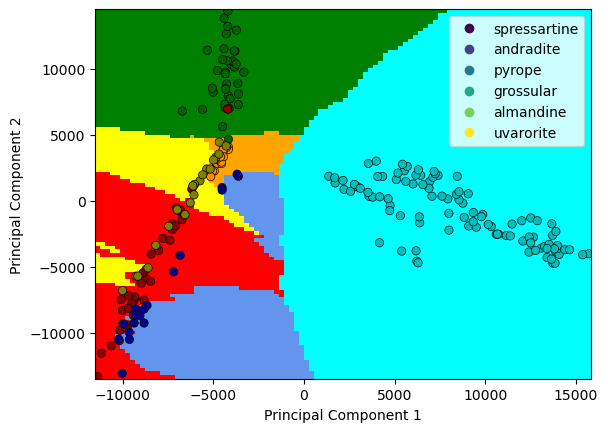

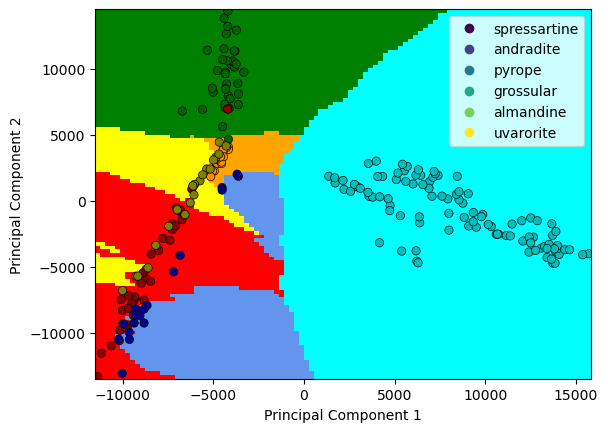

In [ ]:

# runs PCA with two PCs
pca = PCA(n_components=2)
garnet_pca2=pca.fit(garn).transform(garn)
# Create color maps
cmap_light = ListedColormap(["g","r","orange", "yellow","cyan", "cornflowerblue"])
cmap_bold = ["darkgreen","darkred","darkorange", "olive","c", "darkblue"]
for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=5)
    clf.fit(garnet_pca2, types)
    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        garnet_pca2,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="Principal Component 1",
        ylabel="Principal Component 2",
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=garnet_pca2[:, 0],
        y=garnet_pca2[:, 1],
        hue=types,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.legend(handles=scatter.legend_elements()[0],
           labels=['spressartine','andradite','pyrope','grossular','almandine','uvarorite'],loc='upper right')


This decision boundary graph shows how the K nearest neighbor classifier will sort new data in the first two principal components. Note that this is, in effect, a projecion of the 26 dimensional space in which the classifier is actually running. Recall that the three dimensional graph according to the first, third, and fifth components showed more splitting in the samples than can be seen in just two dimensions.

### Neural Network Approach

Now we will construct a new classifier using a Neural Network.

In [ ]:
# test train split for Neural Net
garn_train_nn, garn_test_nn, types_train_nn, types_test_nn=train_test_split(
    garn, types, test_size=0.2, random_state=42)
#load keras and define the model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(7, activation="softmax")
])

#define optimizer and loss function
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
# run the model
model.fit(garn_train_nn, types_train_nn, epochs=10, batch_size=128)


Epoch 1/10
2/2 [==============================] - 1s 111ms/step - loss: 741.2734 - accuracy: 0.1989
Epoch 2/10
2/2 [==============================] - 0s 109ms/step - loss: 1038.4622 - accuracy: 0.7366
Epoch 3/10
2/2 [==============================] - 0s 108ms/step - loss: 199.8749 - accuracy: 0.8548
Epoch 4/10
2/2 [==============================] - 0s 101ms/step - loss: 49.3539 - accuracy: 0.8871
Epoch 5/10
2/2 [==============================] - 0s 89ms/step - loss: 351.7116 - accuracy: 0.8280
Epoch 6/10
2/2 [==============================] - 0s 88ms/step - loss: 167.2294 - accuracy: 0.8978
Epoch 7/10
2/2 [==============================] - 0s 92ms/step - loss: 33.9363 - accuracy: 0.9409
Epoch 8/10
2/2 [==============================] - 0s 98ms/step - loss: 208.3741 - accuracy: 0.8710
Epoch 9/10
2/2 [==============================] - 0s 89ms/step - loss: 34.9175 - accuracy: 0.9247
Epoch 10/10
2/2 [==============================] - 0s 84ms/step - loss: 24.5755 - accuracy: 0.9516


In [ ]:
#use the model to predict and returns
#an array with the prediction for each training data point
predictions= model.predict(garn_test_nn)
pred_types_nn=np.argmax(predictions,axis=1)

# produces confusion matrix
test_list_nn=types_test_nn.tolist()
pred_list_nn=pred_types_nn.tolist()
NN_cm=confusion_matrix(types_test,pred_types,normalize='true')
print(NN_cm)

2/2 [==============================] - 0s 15ms/step
[[1.   0.   0.   0.   0.   0.  ]
 [0.25 0.75 0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.   0.25 0.   0.75 0.   0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]]


This runs ten epochs of a neural net model. It then generates the confusion matrix for this approach. The below chunk returns the test accuracy.

In [ ]:
# test accuracy
test_lose, test_acc=model.evaluate(garn_test_nn,types_test_nn)
print(f"test_acc:{test_acc}")


2/2 [==============================] - 0s 10ms/step - loss: 55.4869 - accuracy: 0.9362
test_acc:0.936170220375061
